# JUN 작업 파일

## 파일 로드 및 확인

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 데이터 불러오기
df = pd.read_csv('C:/Users/galaxy/Desktop/2023/JB_Data/loan_customer.csv')
# 데이터 기본 정보 확인
df.info()    # 데이터 정보 출력 (데이터 타입, 누락값 확인)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 16906 non-null  object 
 3   FLAG_OWN_REALTY             14429 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  16700 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  16851 non-null  float64
 12  DAYS_BIRTH                  19251 non-null  float64
 13  DAYS_EMPLOYED               168

In [2]:
column_info = {'SK_ID_CURR':'대출식별번호',
'NAME_CONTRACT_TYPE':'계약유형',
'CODE_GENDER':'성별',
'FLAG_OWN_REALTY':'자가부동산보유여부',
'CNT_CHILDREN':'자녀수',
'AMT_INCOME_TOTAL':'소득금액(USD)',
'AMT_CREDIT':'신용대출금액(USD)',
'NAME_INCOME_TYPE':'소득유형',
'NAME_EDUCATION_TYPE':'학력',
'NAME_FAMILY_STATUS':'결혼상태',
'NAME_HOUSING_TYPE':'주거형태',
'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구',
'DAYS_BIRTH':'대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
'DAYS_REGISTRATION':'대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
'DAYS_ID_PUBLISH':'대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
'FLAG_MOBIL':'휴대폰번호등록여부',
'FLAG_EMP_PHONE':'고용주연락처등록여부',
'FLAG_WORK_PHONE':'직장전화번호등록여부',
'FLAG_PHONE':'집전화번호등록여부',
'FLAG_EMAIL':'이메일주소등록여부',
'REGION_RATING_CLIENT':'거주지등급',
'WEEKDAY_APPR_PROCESS_START':'대출신청요일',
'HOUR_APPR_PROCESS_START':'대출신청시간대',
'REG_CITY_NOT_LIVE_CITY':'고객의등록지주소와실거주지일치여부',
'REG_CITY_NOT_WORK_CITY':'고객의등록지주소와직장주소일치여부',
'LIVE_CITY_NOT_WORK_CITY':'고객의실거주지와직장주소일치여부',
'ORGANIZATION_TYPE':'근무회사유형',
'FLAG_DOCUMENT_2':'문서2제공여부',
'FLAG_DOCUMENT_3':'문서3제공여부',
'FLAG_DOCUMENT_4':'문서4제공여부',
'CB_SCORE_1':'신용점수1',
'CB_SCORE_2':'신용점수2',
'CB_SCORE_3':'신용점수3',
'TARGET':'연체여부'}

In [3]:

df_colinfo = df.copy() 

for col in df_colinfo.columns : 
    df_colinfo.rename(columns = {col:column_info[col]}, inplace = True)
    print(col+'컬럼의 이름을 '+column_info[col]+'로 수정했습니다 ')

SK_ID_CURR컬럼의 이름을 대출식별번호로 수정했습니다 
NAME_CONTRACT_TYPE컬럼의 이름을 계약유형로 수정했습니다 
CODE_GENDER컬럼의 이름을 성별로 수정했습니다 
FLAG_OWN_REALTY컬럼의 이름을 자가부동산보유여부로 수정했습니다 
CNT_CHILDREN컬럼의 이름을 자녀수로 수정했습니다 
AMT_INCOME_TOTAL컬럼의 이름을 소득금액(USD)로 수정했습니다 
AMT_CREDIT컬럼의 이름을 신용대출금액(USD)로 수정했습니다 
NAME_INCOME_TYPE컬럼의 이름을 소득유형로 수정했습니다 
NAME_EDUCATION_TYPE컬럼의 이름을 학력로 수정했습니다 
NAME_FAMILY_STATUS컬럼의 이름을 결혼상태로 수정했습니다 
NAME_HOUSING_TYPE컬럼의 이름을 주거형태로 수정했습니다 
REGION_POPULATION_RELATIVE컬럼의 이름을 거주지역의표준화된인구로 수정했습니다 
DAYS_BIRTH컬럼의 이름을 대출신청시점에서의일단위나이(기준시점대비상대적인시간)로 수정했습니다 
DAYS_EMPLOYED컬럼의 이름을 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_REGISTRATION컬럼의 이름을 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_ID_PUBLISH컬럼의 이름을 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
FLAG_MOBIL컬럼의 이름을 휴대폰번호등록여부로 수정했습니다 
FLAG_EMP_PHONE컬럼의 이름을 고용주연락처등록여부로 수정했습니다 
FLAG_WORK_PHONE컬럼의 이름을 직장전화번호등록여부로 수정했습니다 
FLAG_PHONE컬럼의 이름을 집전화번호등록여부로 수정했습니다 
FLAG_EMAIL컬럼의 이름을 이메일주소등록여부로 수정했습니다 
REGION_RATING_CLIENT컬럼의 이름을 거주지등급로 수정했습니다 
WEEKDAY_APPR_PROCESS_START

In [4]:
df_colinfo.describe()
df_colinfo.head()       # 데이터 상위 몇 개 행 출력
# 결측치 확인
print("결측치가 있는 행의 수는",len(df_colinfo),"중",len(df_colinfo[df_colinfo.isnull().any(axis=1)]))
# 대부분의 행이 결측치가 있음
missing_values = df_colinfo.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23562


성별                                         7094
자가부동산보유여부                                  9571
신용대출금액(USD)                                7300
거주지역의표준화된인구                                7149
대출신청시점에서의일단위나이(기준시점대비상대적인시간)               4749
대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)             7149
대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)    9733
대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)     4741
신용점수1                                      6146
신용점수2                                      8274
신용점수3                                      7108
dtype: int64

## 변수 편집

In [5]:
data = df.copy()

### 1. 변수 범주화

In [16]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH']/360
data['DAYS_BIRTH'] = data['DAYS_BIRTH']*-1

data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(lambda x: math.ceil(x) if not np.isnan(x) else np.nan)
data['DAYS_BIRTH']

0        27.0
1        53.0
2        36.0
3        32.0
4         NaN
         ... 
23995    54.0
23996    34.0
23997     NaN
23998    39.0
23999    36.0
Name: DAYS_BIRTH, Length: 24000, dtype: float64

### 2. 변수 결측치 채우기

#### 1. 이상치 처리
- #### 이상값 모두 결측치로 통일하여 처리

In [19]:
#data = data.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)
data = df.copy()
# data = data.replace(['XNA'], np.nan)

- 최종 결측치 컬럼 확인

In [20]:
# 결측값이 있는 행 선택하기
col_mv_list = data.columns[data.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_CREDIT 신용대출금액(USD)
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


#### 2. 패턴을 찾아 채우기

In [10]:
from scipy import stats
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            mode_result = stats.mode(df[col])
            fill_value = mode_result.mode[0]
           
        elif fill_method == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

In [11]:
fill_methods = {

    'NAME_FAMILY_STATUS': 'mode',

}

data = replace_missing_values(data,fill_methods)
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

C:\Users\galaxy\AppData\Local\Temp\ipykernel_11864\1735547379.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(df[col])
C:\Users\galaxy\AppData\Local\Temp\ipykernel_11864\1735547379.py:5: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_result = stats.mode(df[col])


['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

In [21]:
data.loc[data['FLAG_EMP_PHONE'] == 0, [ 'DAYS_EMPLOYED']] = 365243.0

data.loc[data['DAYS_EMPLOYED'] == 365243.0, [ 'DAYS_EMPLOYED']]  = 0


In [41]:
tmp = data.loc[:, [ 'REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT' ]]
tmp_result= tmp.groupby(['REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE']).size().reset_index(name="개수")
tmp_result

,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,개수
0,1,0.003541,42
1,1,0.011657,176
2,1,0.032561,347
3,1,0.046220,734
4,1,0.072508,503
...,...,...,...
76,3,0.010556,112
77,3,0.018029,317
78,3,0.018209,330
79,3,0.020246,390


In [36]:
tmp_no_duplicates = tmp.drop_duplicates()
tmp_no_duplicates

,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT
0,0.018801,2
1,NaN,2
2,0.018634,2
3,0.026392,2
4,0.009175,2
...,...,...
1189,0.004849,2
2038,0.001333,3
4730,0.000533,3
7422,0.000938,3


#### 3. 딥러닝 방식

In [109]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

In [49]:
numeric_columns = numeric_columns.to_list()
numeric_columns = [x for x in numeric_columns if x not in missing_values]
numeric_columns

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'TARGET']

In [50]:
categorical_columns = categorical_columns.to_list()
categorical_columns = [x for x in categorical_columns if x not in missing_values]
categorical_columns

['NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

### 범주형 맞출때

In [110]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 결측치 있는 데이터 준비
data_with_missing = data.copy()

# 결측치 채우기를 위한 데이터 준비
target_column = 'CODE_GENDER'  # 채울 결측치가 있는 컬럼명
input_numeric_columns = numeric_columns[1:]

# 성별 전용
data_with_missing.loc[data_with_missing['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan

# 결측치가 없는 데이터 추출 추후 행 인덱스
no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
# 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
missing_data_index = data_with_missing[target_column].isnull()



# 범주형 변수 인코딩
encoder = OneHotEncoder(drop='first')
categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()

# 모든 입력 데이터 결합
input_data_encoded = np.hstack((data_with_missing[input_numeric_columns].values, categorical_data_encoded))
len(input_data_encoded)

# 데이터 스케일링
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data_encoded)


print(len(input_data_scaled))

train_data_scaled = input_data_scaled[data_with_missing[target_column].notnull()]

print(len(train_data_scaled))

# 결측치를 채울 Autoencoder 모델 구성
input_dim = input_data_scaled.shape[1]



model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 선형 활성화 함수 사용
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# 타겟 컬럼 추후 원래 레이블으로 표기하기 위함

# LabelEncoder 객체 생성 및 학습
encoder_target = LabelEncoder()
encoder_target.fit(no_missing_data[target_column])
integer_encoded_labels = encoder_target.transform(no_missing_data[target_column])
integer_encoded_labels



one_hot_train_labels = to_categorical(integer_encoded_labels)

# 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, one_hot_train_labels, test_size=0.2, random_state=42)

# 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 훈련
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=32, callbacks=[early_stopping_cb])






24000
16905
423/423 [==============================] - 3s 4ms/step - loss: 0.6503 - accuracy: 0.6632 - val_loss: 0.6395 - val_accuracy: 0.6625


In [111]:
missing_data = input_data_scaled[data_with_missing[target_column].isnull()]
print(len(missing_data))
print(len(missing_data[0]))

print(len(missing_data[0]))

# 훈련된 모델로 결측치 예측 및 채우기
predicted_values = model.predict(missing_data)
filled_values = predicted_values.squeeze()


original_label=np.argmax(filled_values, axis=1)
predicted_labels_string = encoder_target.inverse_transform(original_label)

# 결측치를 채워 넣음
data_with_fill = data_with_missing.copy()
data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = predicted_labels_string


data_with_fill.loc[missing_data_index, target_column].head()

7095
113
113
222/222 [==============================] - 1s 2ms/step


1    F
4    F
5    F
7    F
8    F
Name: CODE_GENDER, dtype: object

#### 다음에 맞출때는 젠더를 포함해서 맞추는 것도 방법

In [112]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

numeric_columns = numeric_columns.to_list()
numeric_columns = [x for x in numeric_columns if x not in missing_values]
numeric_columns

categorical_columns = categorical_columns.to_list()
categorical_columns = [x for x in categorical_columns if x not in missing_values]
categorical_columns

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

In [113]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 결측치 있는 데이터 준비
data_with_missing = data.copy()

# 결측치 채우기를 위한 데이터 준비
target_column = 'FLAG_OWN_REALTY'  # 채울 결측치가 있는 컬럼명
input_numeric_columns = numeric_columns[1:]

# 결측치가 없는 데이터 추출 추후 행 인덱스
no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
# 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
missing_data_index = data_with_missing[target_column].isnull()



# 범주형 변수 인코딩
encoder = OneHotEncoder(drop='first')
categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()

# 모든 입력 데이터 결합
input_data_encoded = np.hstack((data_with_missing[input_numeric_columns].values, categorical_data_encoded))
len(input_data_encoded)

# 데이터 스케일링
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data_encoded)


print(len(input_data_scaled))

train_data_scaled = input_data_scaled[data_with_missing[target_column].notnull()]

print(len(train_data_scaled))

# 결측치를 채울 Autoencoder 모델 구성
input_dim = input_data_scaled.shape[1]



model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 선형 활성화 함수 사용
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# 타겟 컬럼 추후 원래 레이블으로 표기하기 위함

# LabelEncoder 객체 생성 및 학습
encoder_target = LabelEncoder()
encoder_target.fit(no_missing_data[target_column])
integer_encoded_labels = encoder_target.transform(no_missing_data[target_column])
integer_encoded_labels



one_hot_train_labels = to_categorical(integer_encoded_labels)

# 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, one_hot_train_labels, test_size=0.2, random_state=42)

# 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 훈련
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=32, callbacks=[early_stopping_cb])






24000
14429
361/361 [==============================] - 1s 3ms/step - loss: 0.6447 - accuracy: 0.6879 - val_loss: 0.6203 - val_accuracy: 0.6885


In [114]:
missing_data = input_data_scaled[data_with_missing[target_column].isnull()]
print(len(missing_data))
print(len(missing_data[0]))

print(len(missing_data[0]))

# 훈련된 모델로 결측치 예측 및 채우기
predicted_values = model.predict(missing_data)
filled_values = predicted_values.squeeze()


original_label=np.argmax(filled_values, axis=1)
predicted_labels_string = encoder_target.inverse_transform(original_label)

# 결측치를 채워 넣음
data_with_fill = data_with_missing.copy()
data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = predicted_labels_string


data_with_fill.loc[missing_data_index, target_column].head()

9571
114
114
300/300 [==============================] - 0s 1ms/step


1     Y
12    Y
13    Y
16    Y
18    Y
Name: FLAG_OWN_REALTY, dtype: object

### 수치형 맞출떄

In [101]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 결측치 있는 데이터 준비
data_with_missing = data.copy()

# 결측치 채우기를 위한 데이터 준비
target_column = 'CB_SCORE_2'  # 채울 결측치가 있는 컬럼명
input_numeric_columns = numeric_columns[1:]

# 결측치가 없는 데이터 추출 추후 행 인덱스
no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
# 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
missing_data_index = data_with_missing[target_column].isnull()



# 범주형 변수 인코딩
encoder = OneHotEncoder(drop='first')
categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()

# 모든 입력 데이터 결합
input_data_encoded = np.hstack((data_with_missing[input_numeric_columns].values, categorical_data_encoded))
len(input_data_encoded)

# 데이터 스케일링
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data_encoded)


print(len(input_data_scaled))

train_data_scaled = input_data_scaled[data_with_missing[target_column].notnull()]

print(len(train_data_scaled))

# 결측치를 채울 Autoencoder 모델 구성
input_dim = input_data_scaled.shape[1]




model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # 선형 활성화 함수 사용
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])


# Prepare target data
target_data = no_missing_data[target_column].values.reshape(-1, 1)
# Scale target data using a new scaler
target_scaler = StandardScaler()
target_data_scaled = target_scaler.fit_transform(target_data)

# 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, target_data_scaled, test_size=0.2, random_state=42)

# 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 훈련
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=32, callbacks=[early_stopping_cb])





24000
15726
Epoch 1/30
394/394 [==============================] - 2s 4ms/step - loss: 1.2759 - mean_squared_error: 1.2134 - val_loss: 1.0575 - val_mean_squared_error: 0.9966
Epoch 2/30
394/394 [==============================] - 1s 3ms/step - loss: 1.1145 - mean_squared_error: 1.0551 - val_loss: 1.0555 - val_mean_squared_error: 0.9976
Epoch 3/30
394/394 [==============================] - 1s 3ms/step - loss: 1.0753 - mean_squared_error: 1.0188 - val_loss: 1.0441 - val_mean_squared_error: 0.9892
Epoch 4/30
394/394 [==============================] - 1s 3ms/step - loss: 1.0568 - mean_squared_error: 1.0035 - val_loss: 1.0353 - val_mean_squared_error: 0.9835
Epoch 5/30
394/394 [==============================] - 1s 3ms/step - loss: 1.0418 - mean_squared_error: 0.9918 - val_loss: 1.0282 - val_mean_squared_error: 0.9797
Epoch 6/30
394/394 [==============================] - 1s 3ms/step - loss: 1.0353 - mean_squared_error: 0.9886 - val_loss: 1.0237 - val_mean_squared_error: 0.9788
Epoch 7/30
394/3

8274
100
100
259/259 [==============================] - 1s 2ms/step


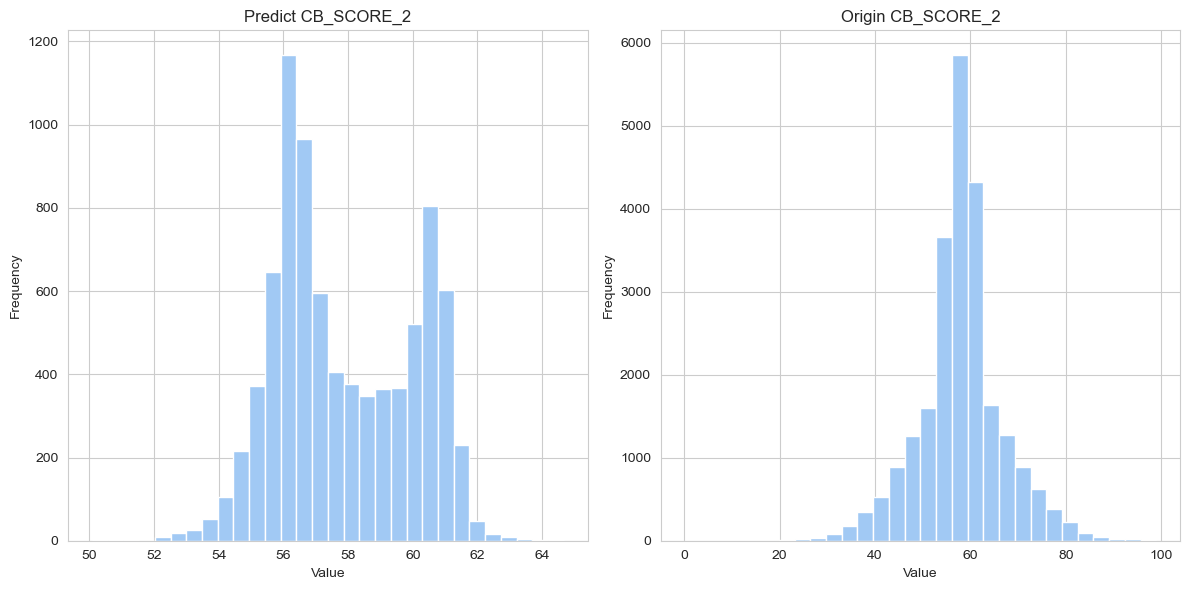

In [102]:
missing_data = input_data_scaled[data_with_missing[target_column].isnull()]
print(len(missing_data))
print(len(missing_data[0]))

print(len(missing_data[0]))

# 훈련된 모델로 결측치 예측 및 채우기
predicted_values = model.predict(missing_data)
predicted_values_orgin = target_scaler.inverse_transform(predicted_values)
filled_values = predicted_values_orgin.squeeze()


# 결측치를 채워 넣음
data_with_fill = data_with_missing.copy()
data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = filled_values


data_with_fill.loc[missing_data_index, target_column]


# 그래프로 분포가 어떻게 그려지는지 한번 확인함.

result = data_with_fill.loc[missing_data_index, target_column]
OG_result = data_with_fill.loc[:, target_column]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

result.hist(bins=30, ax=axs[0])  
axs[0].set_title("Predict "+result.name)
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

OG_result.hist(bins=30, ax=axs[1])  
axs[1].set_title("Origin "+OG_result.name)
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust the padding between and around the subplots.
plt.show()

### 단변량 분석 시각화

In [27]:

numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

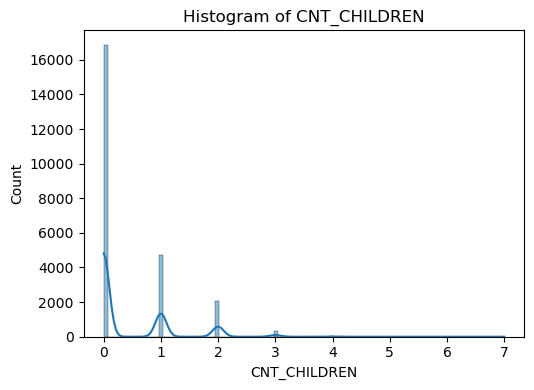

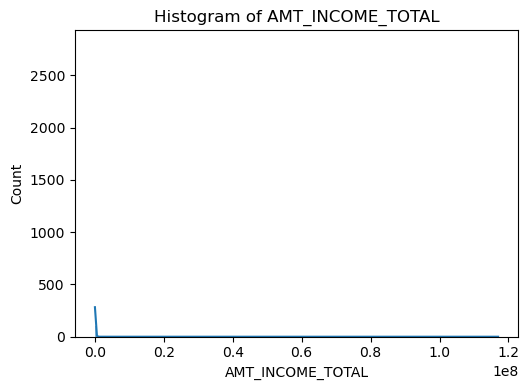

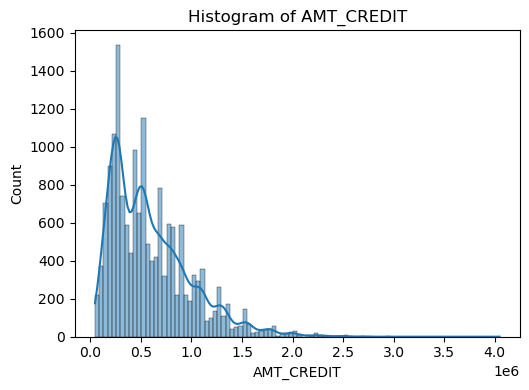

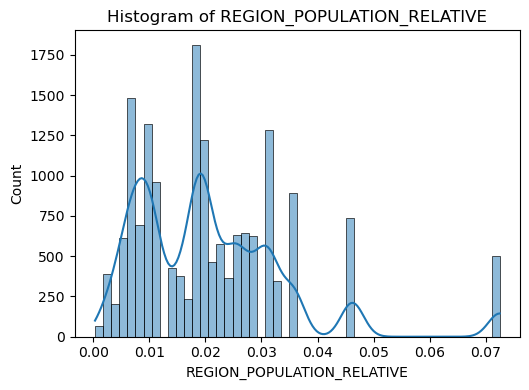

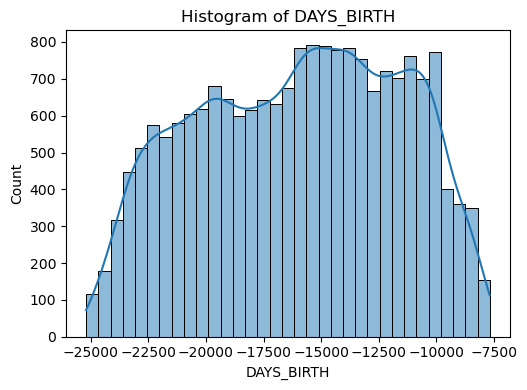

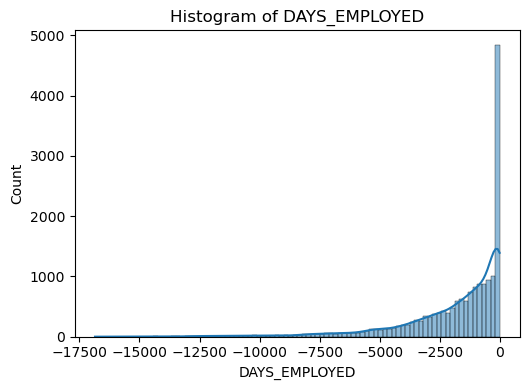

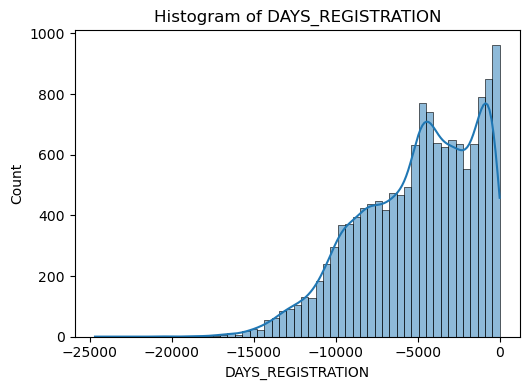

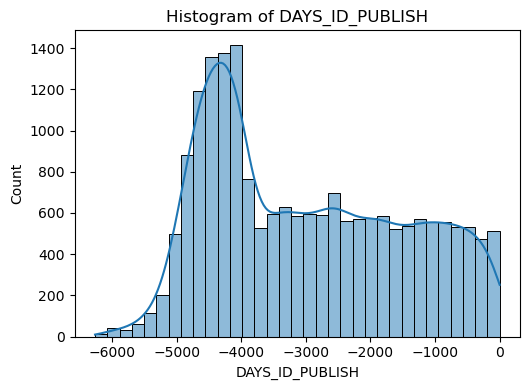

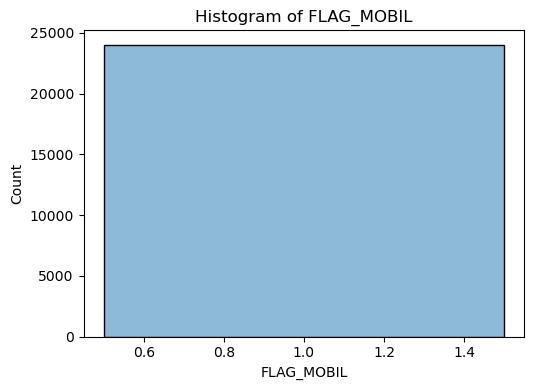

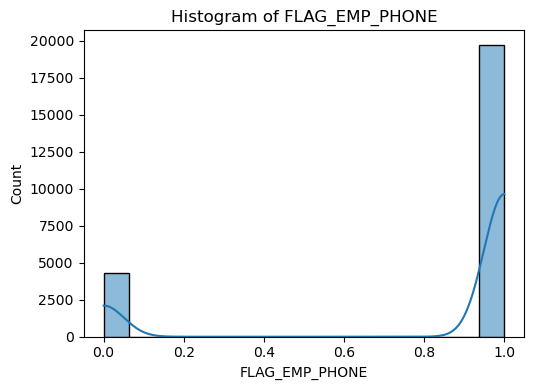

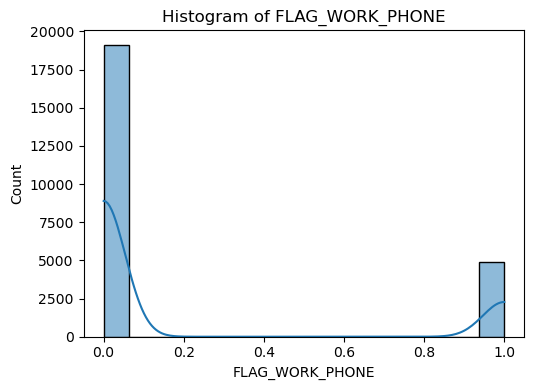

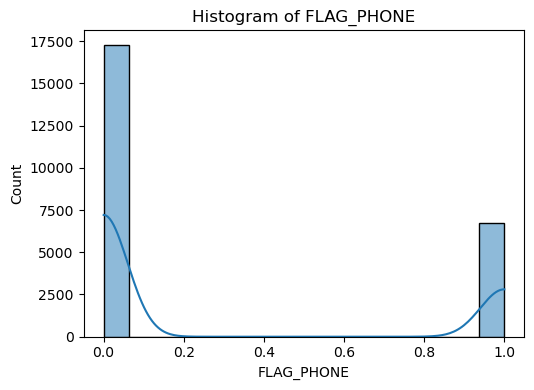

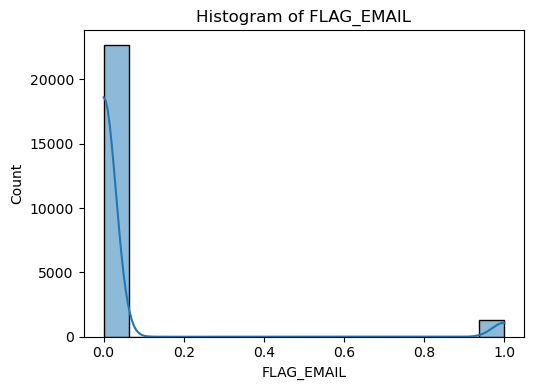

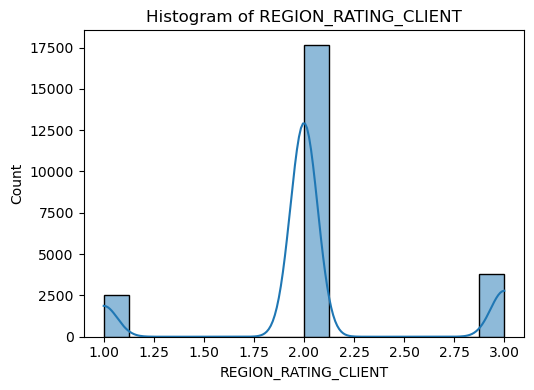

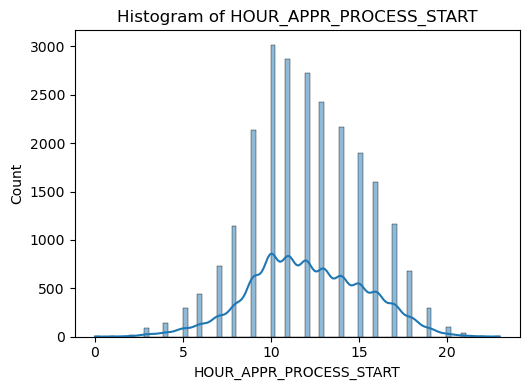

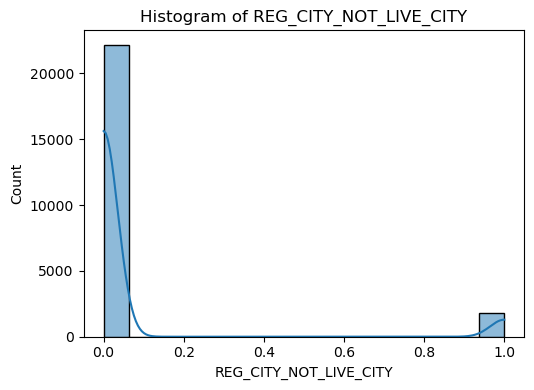

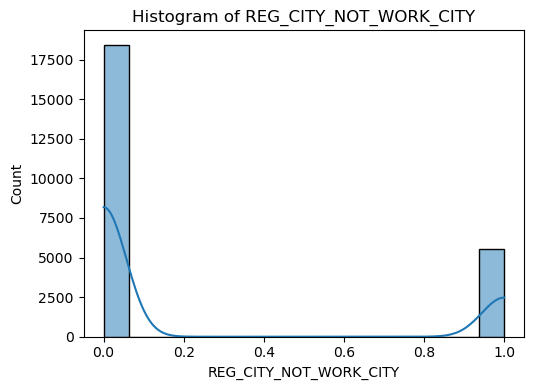

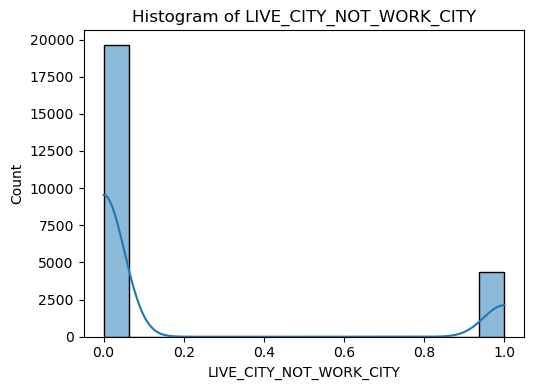

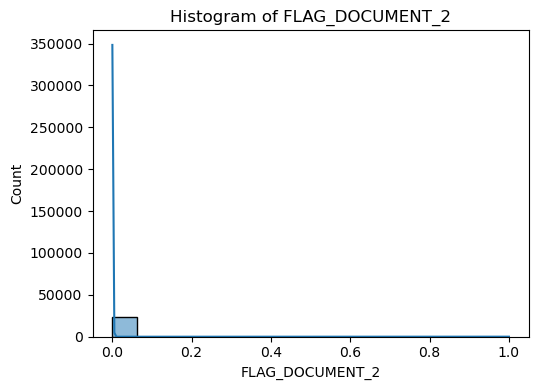

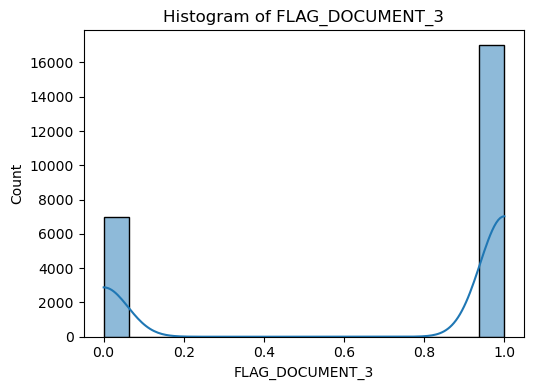

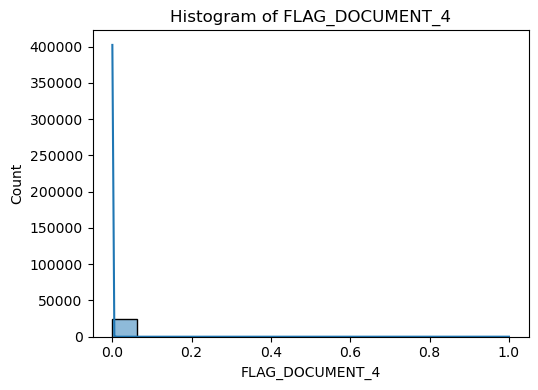

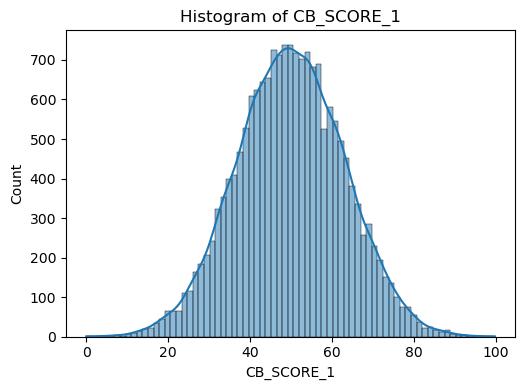

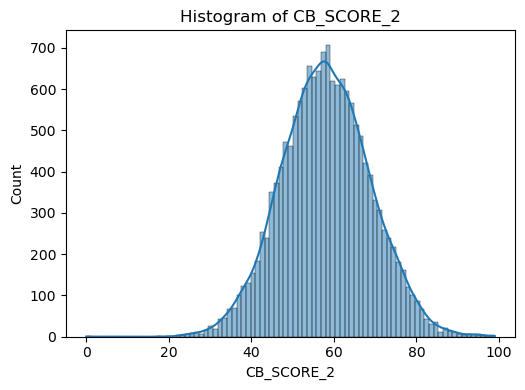

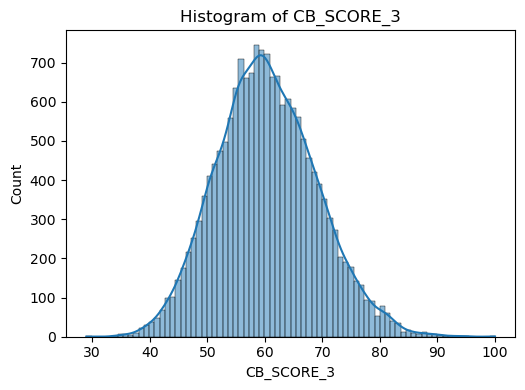

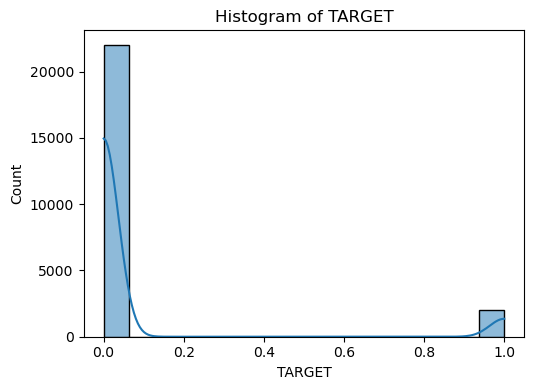

In [28]:
# 수치형 변수 시각화 (히스토그램과 상자 그림)
for column in numeric_columns[1:]:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

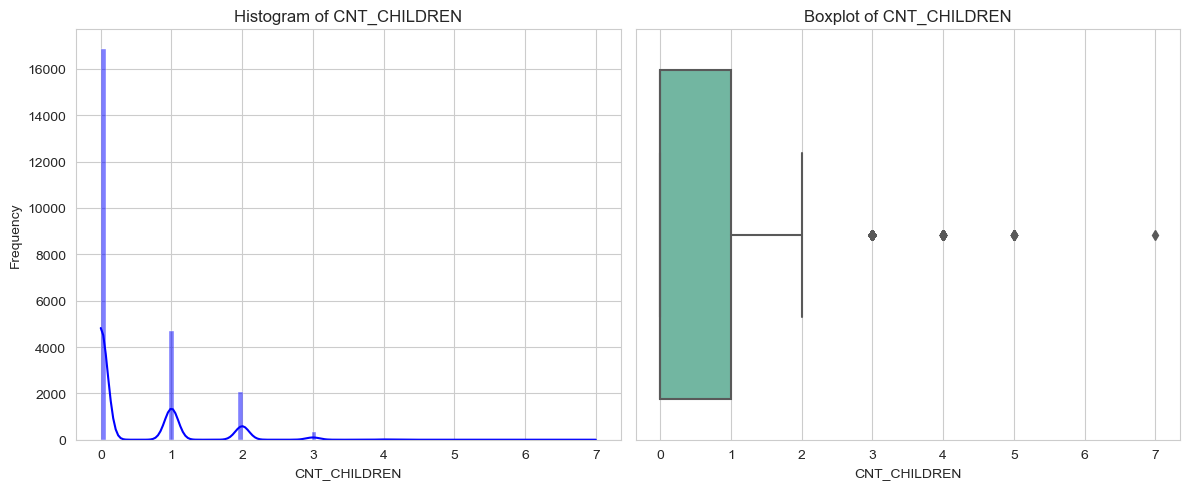

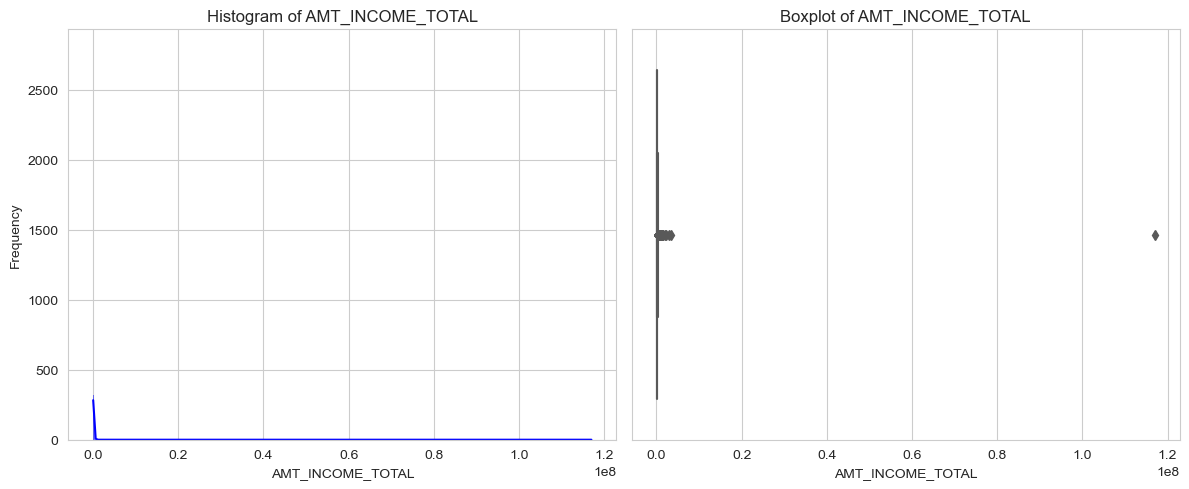

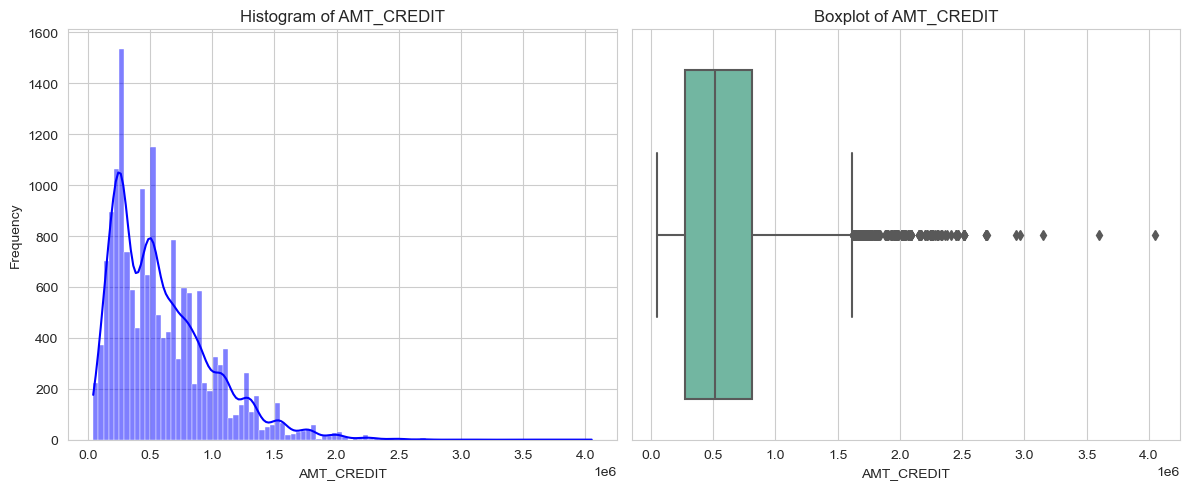

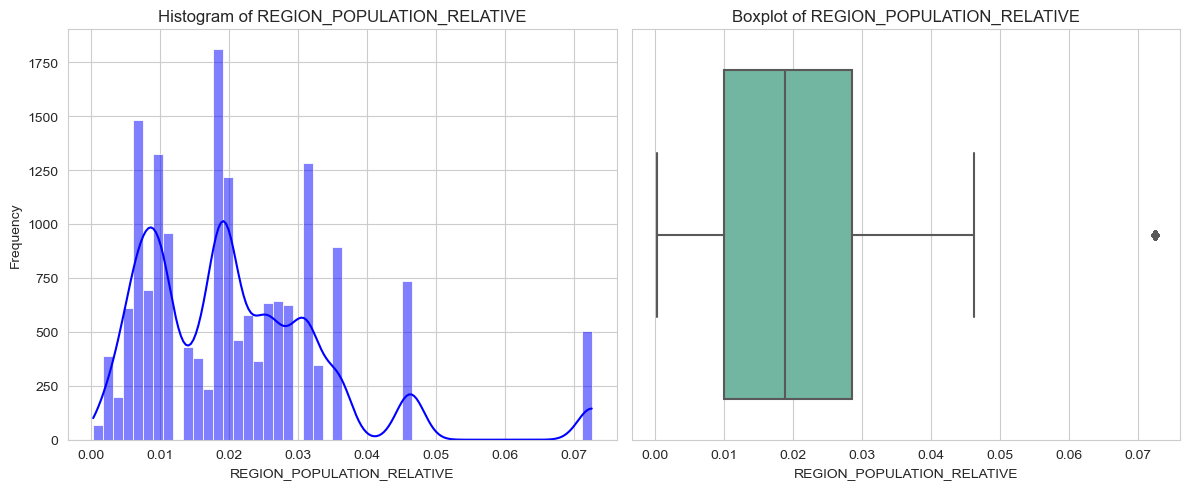

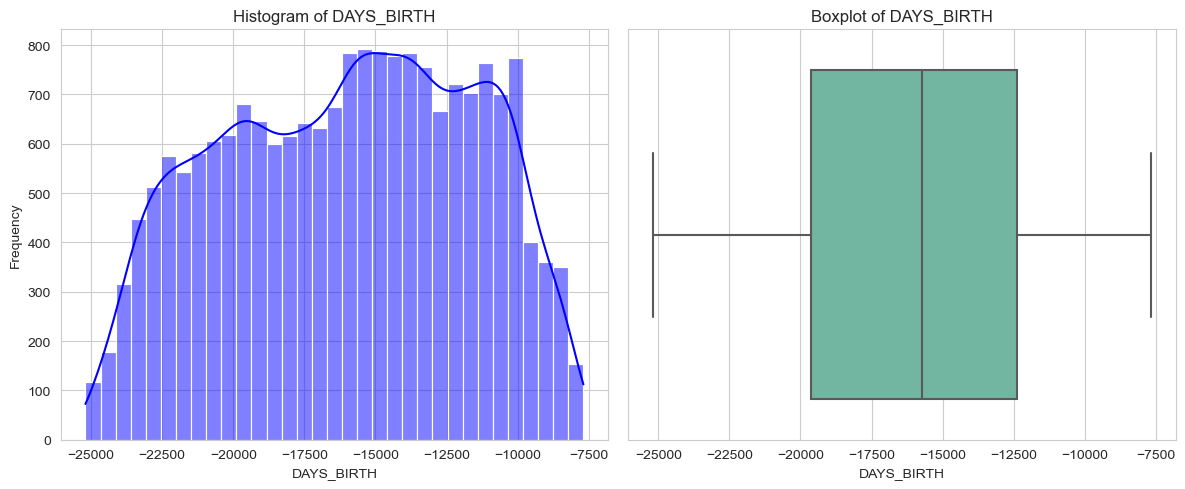

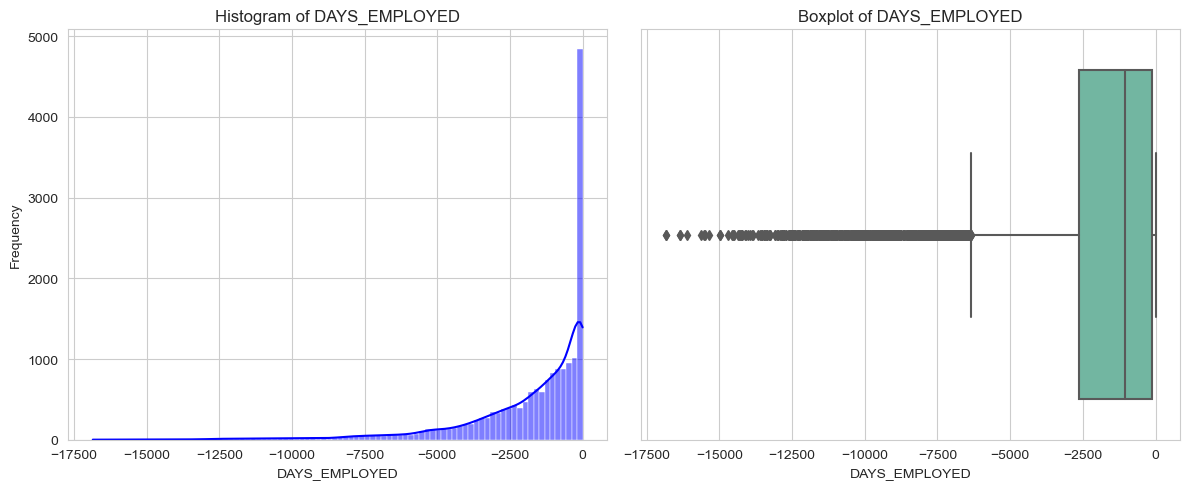

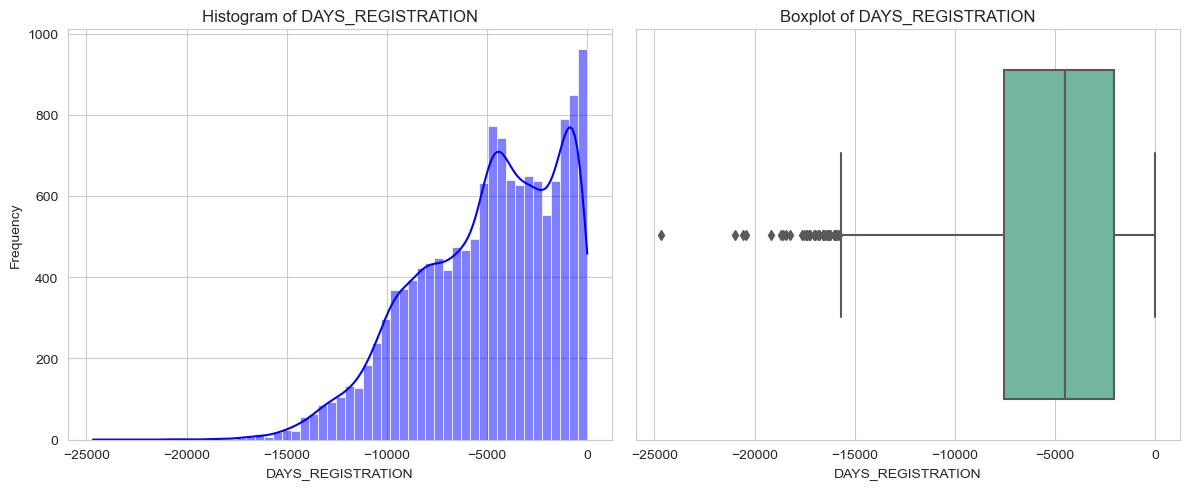

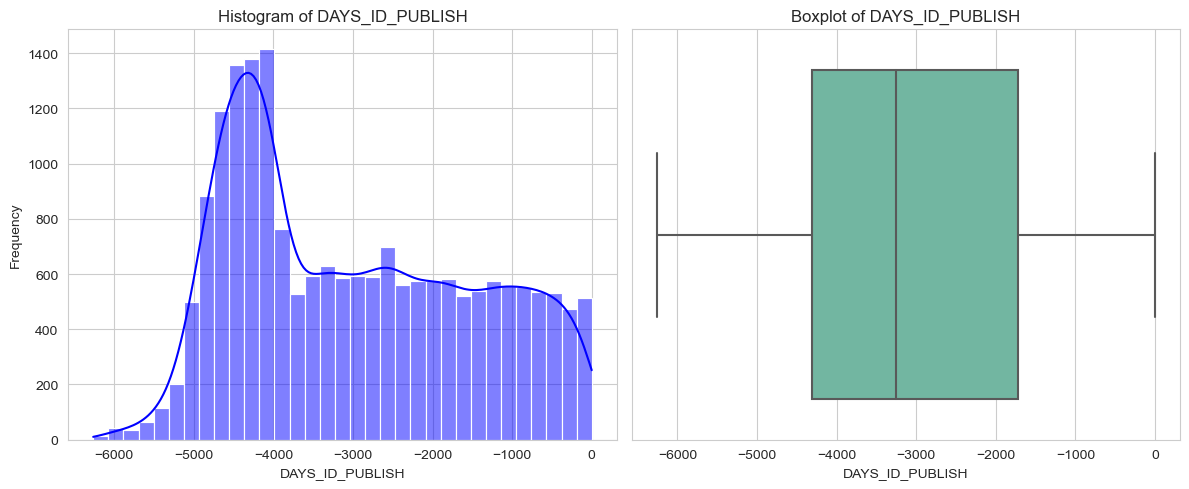

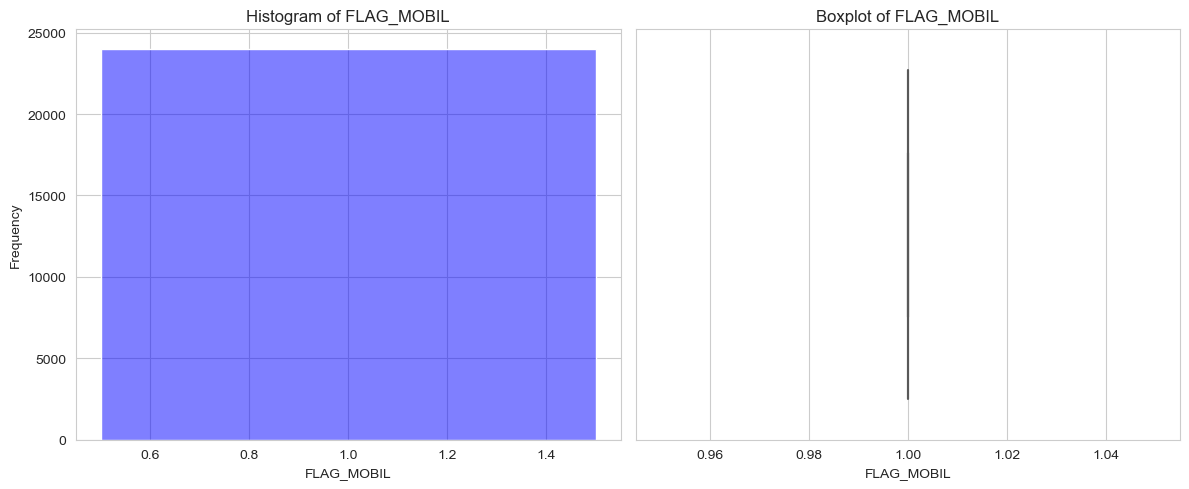

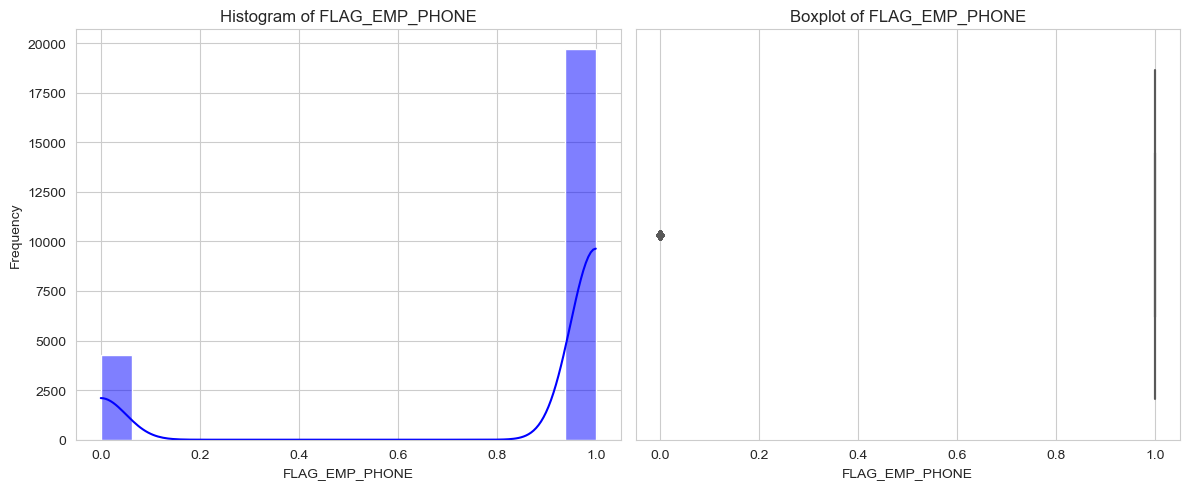

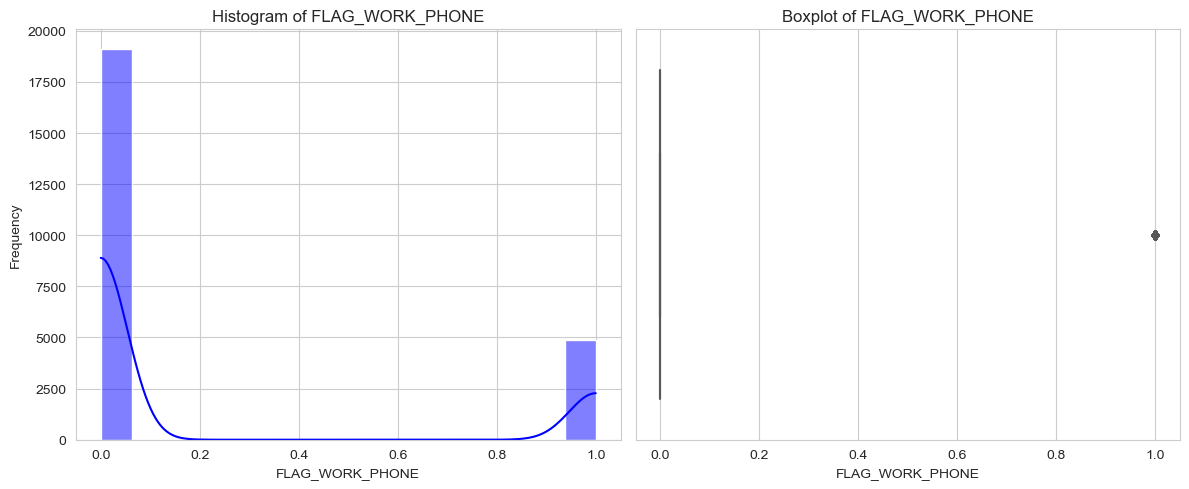

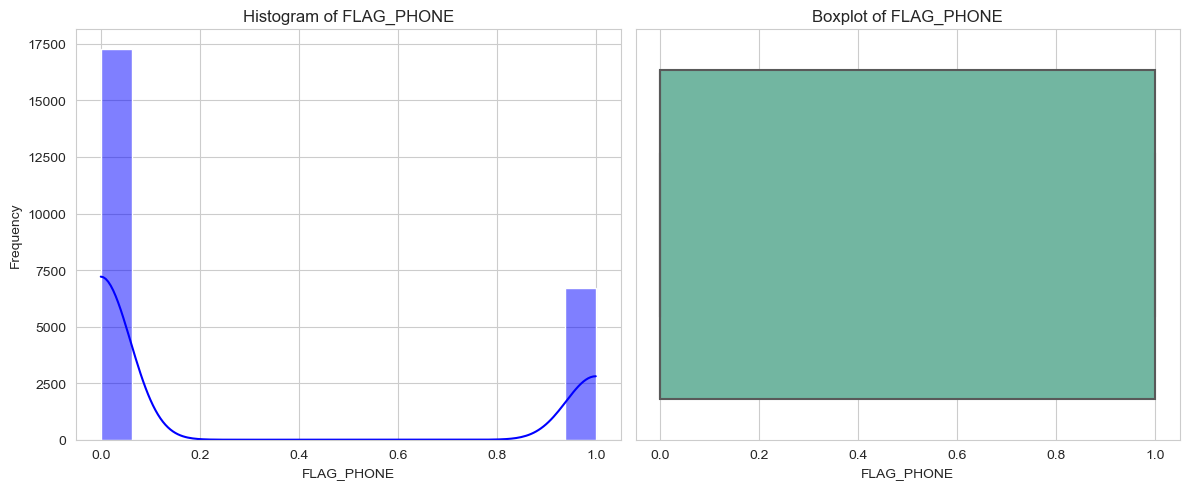

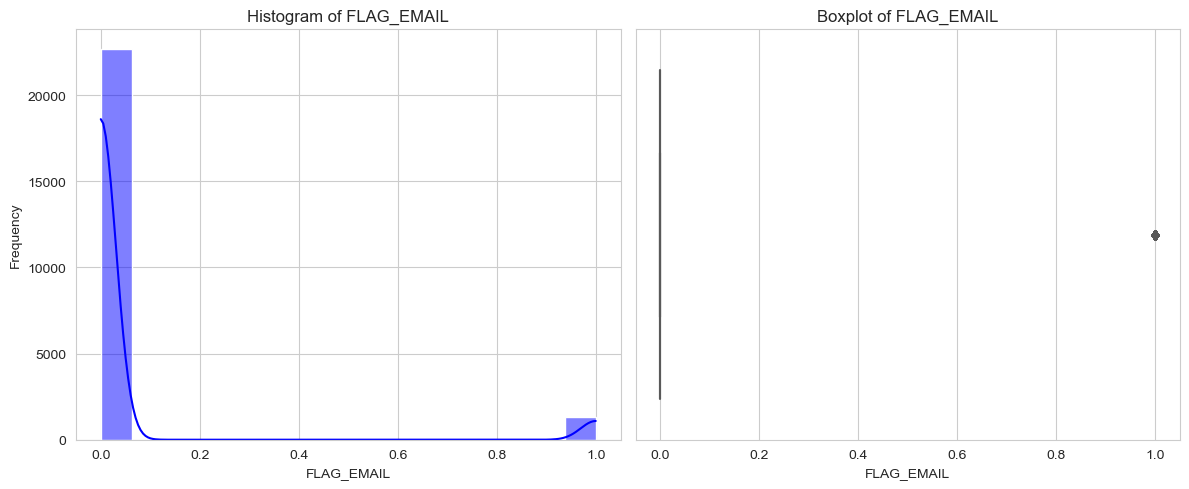

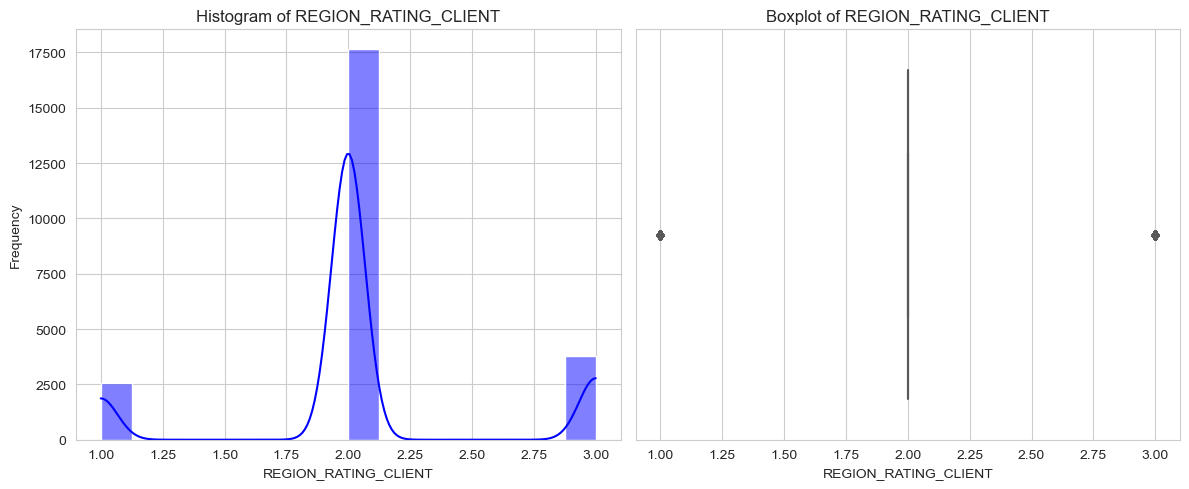

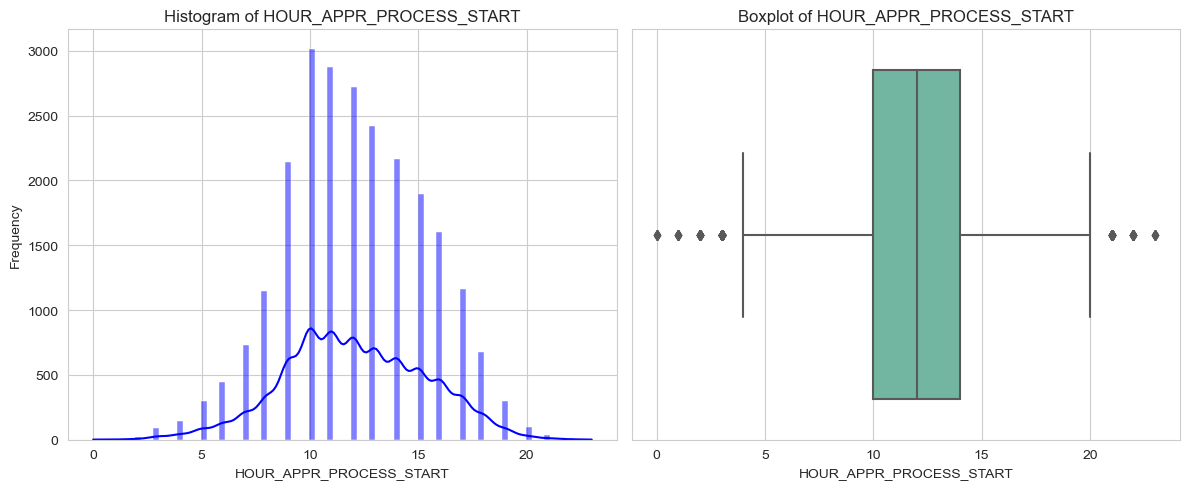

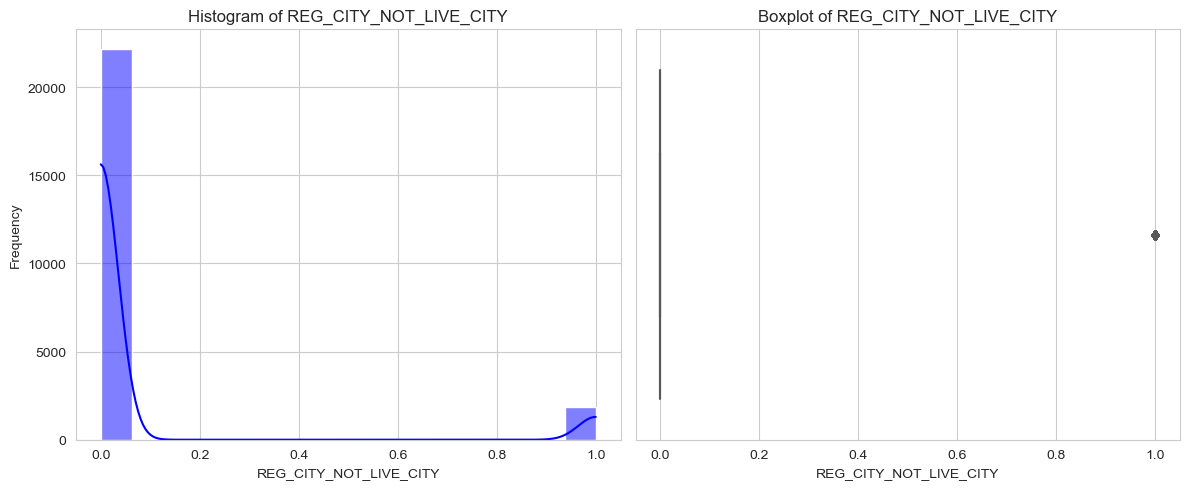

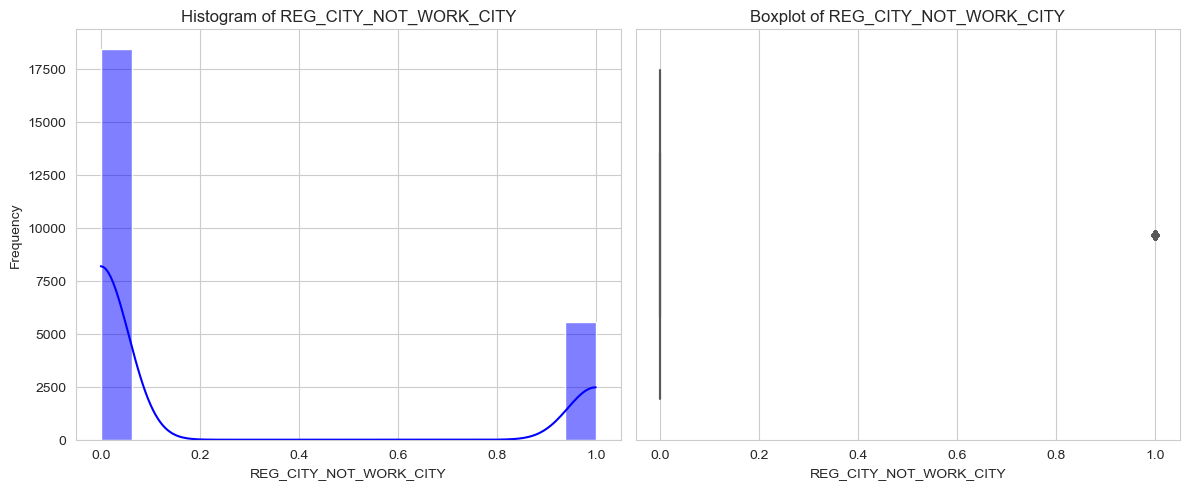

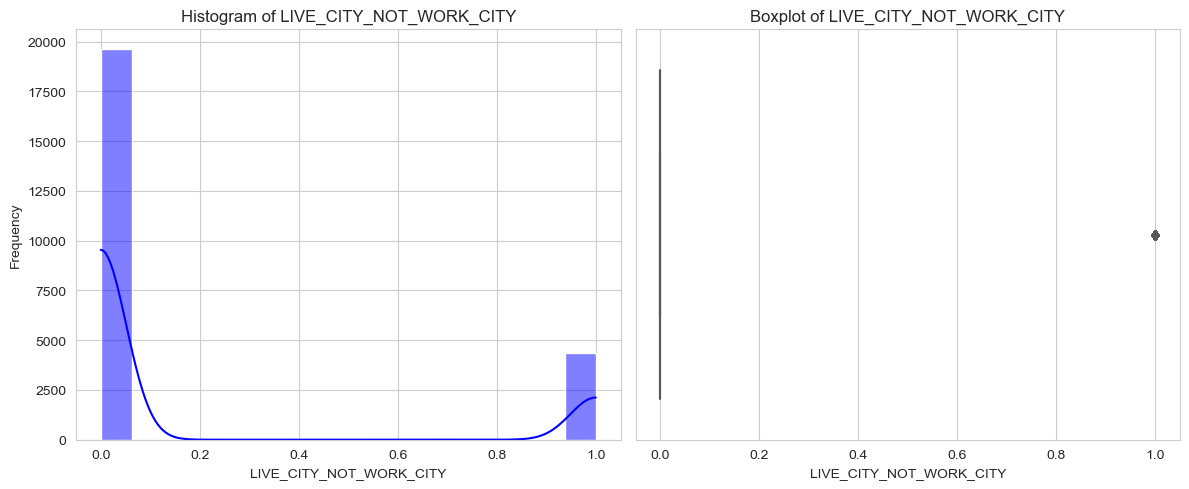

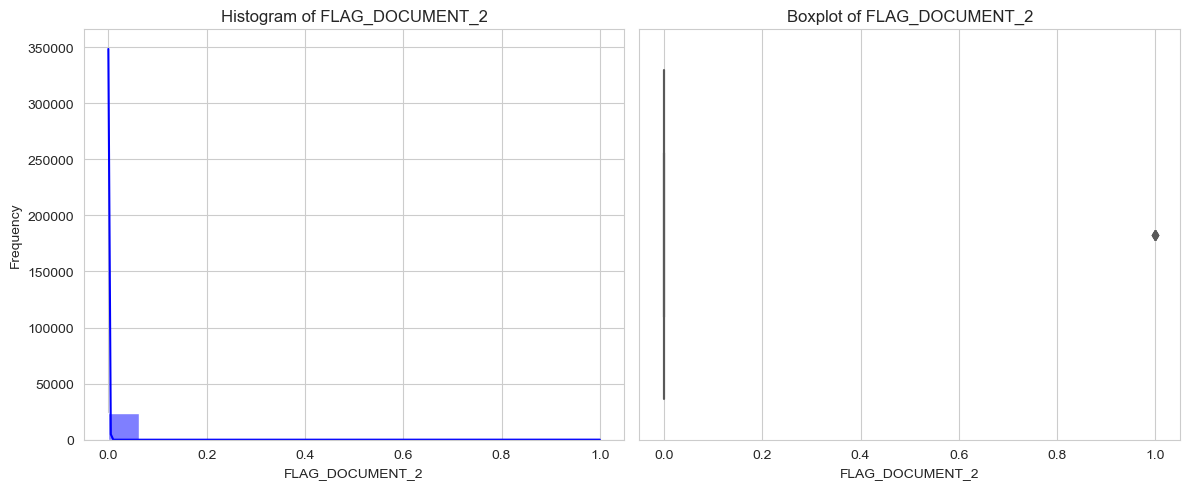

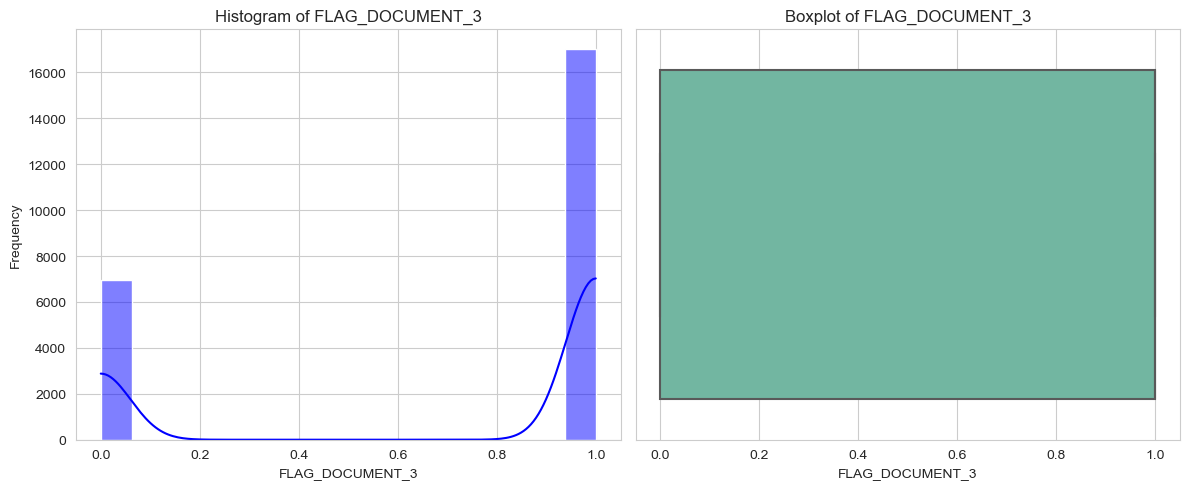

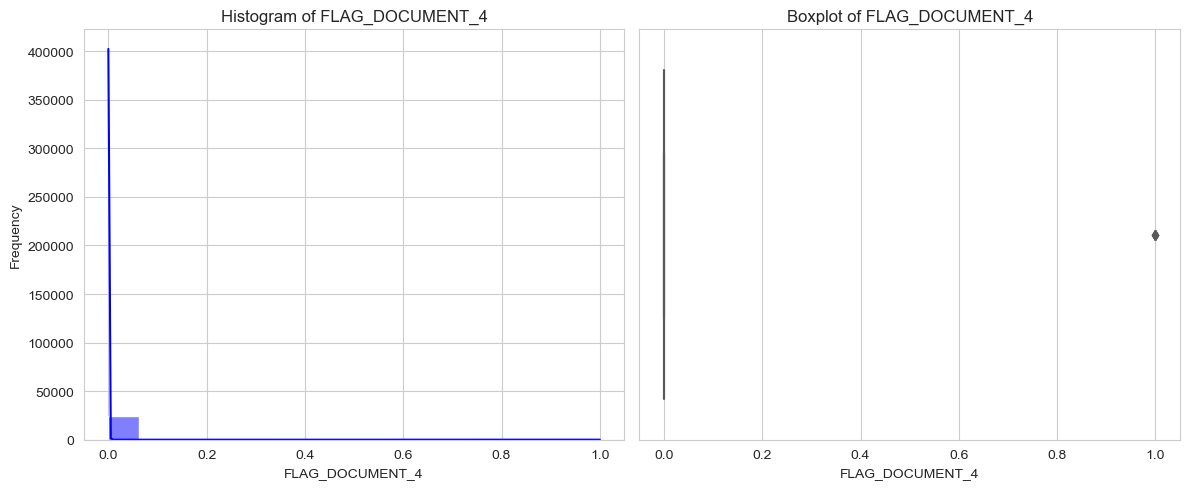

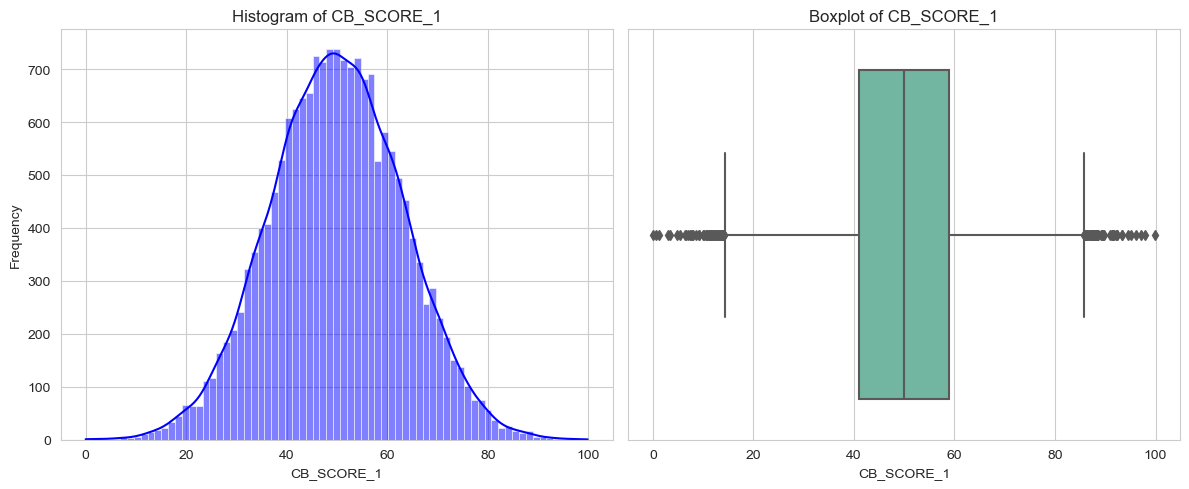

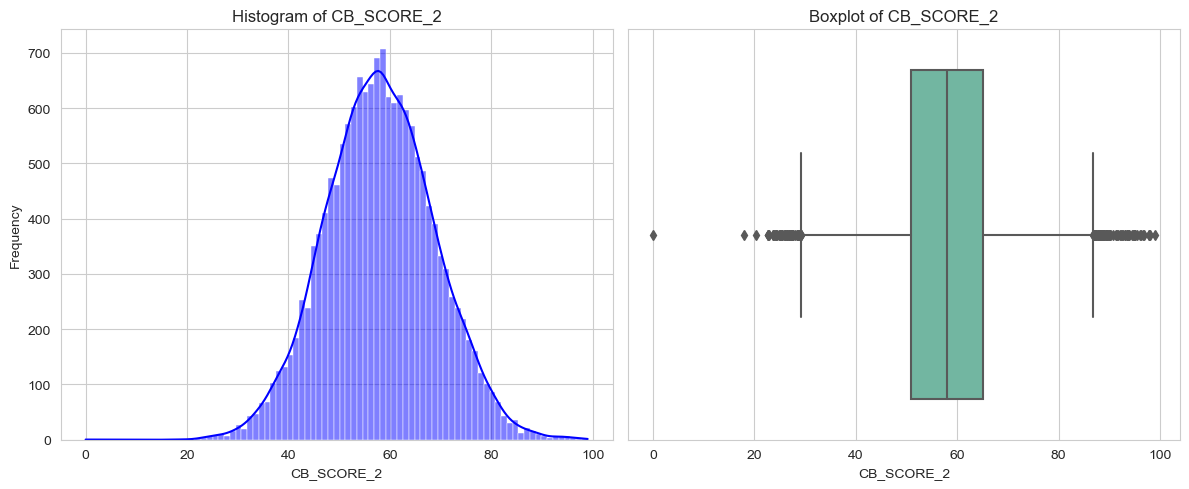

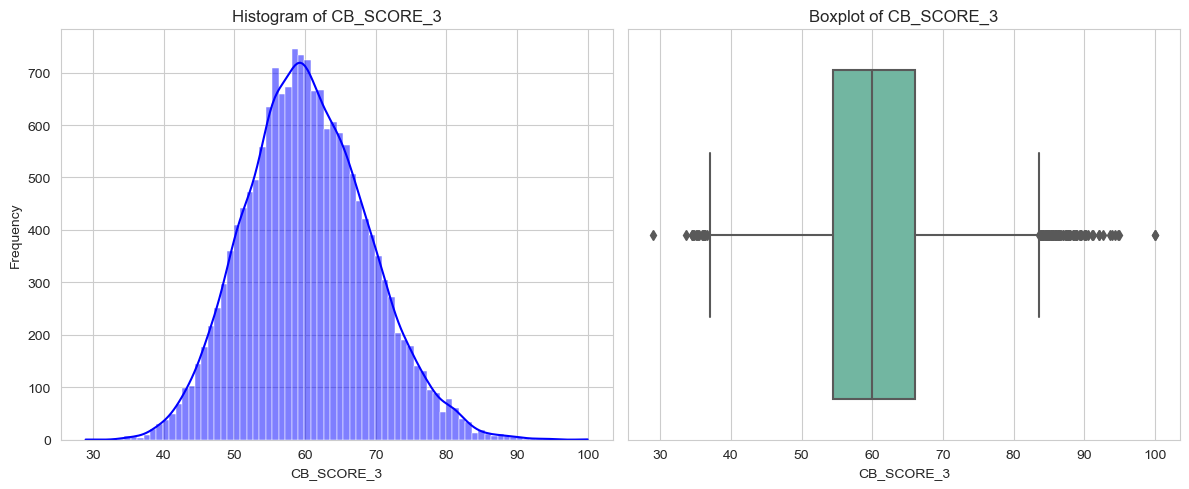

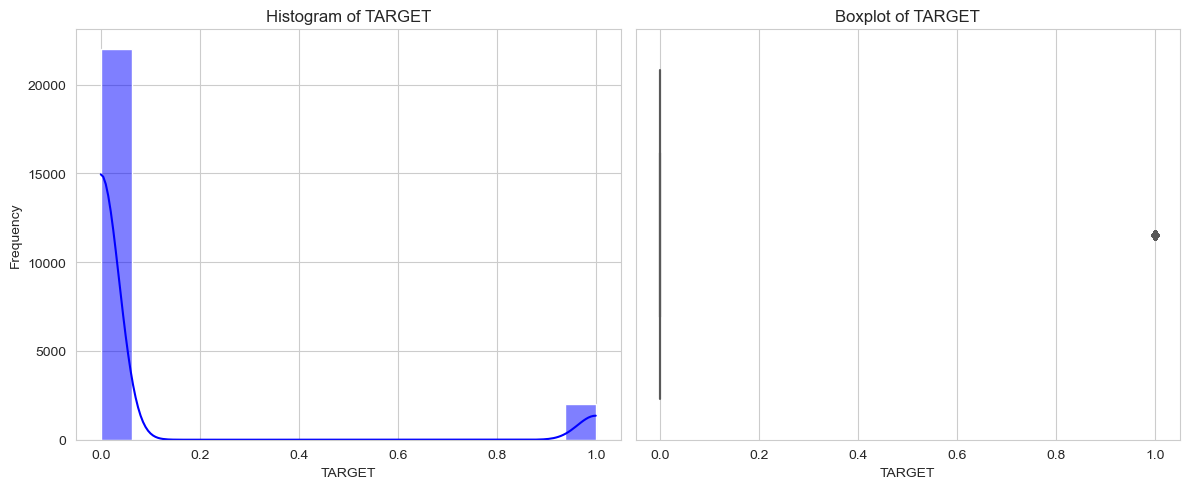

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일

custom_palette = ["blue", "red"]

for column in numeric_columns[1:]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # 히스토그램 그리기
    sns.histplot(data=data, x=column, kde=True, ax=axes[0], color=custom_palette[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # 상자 그림 그리기
    sns.boxplot(data=data, x=column, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

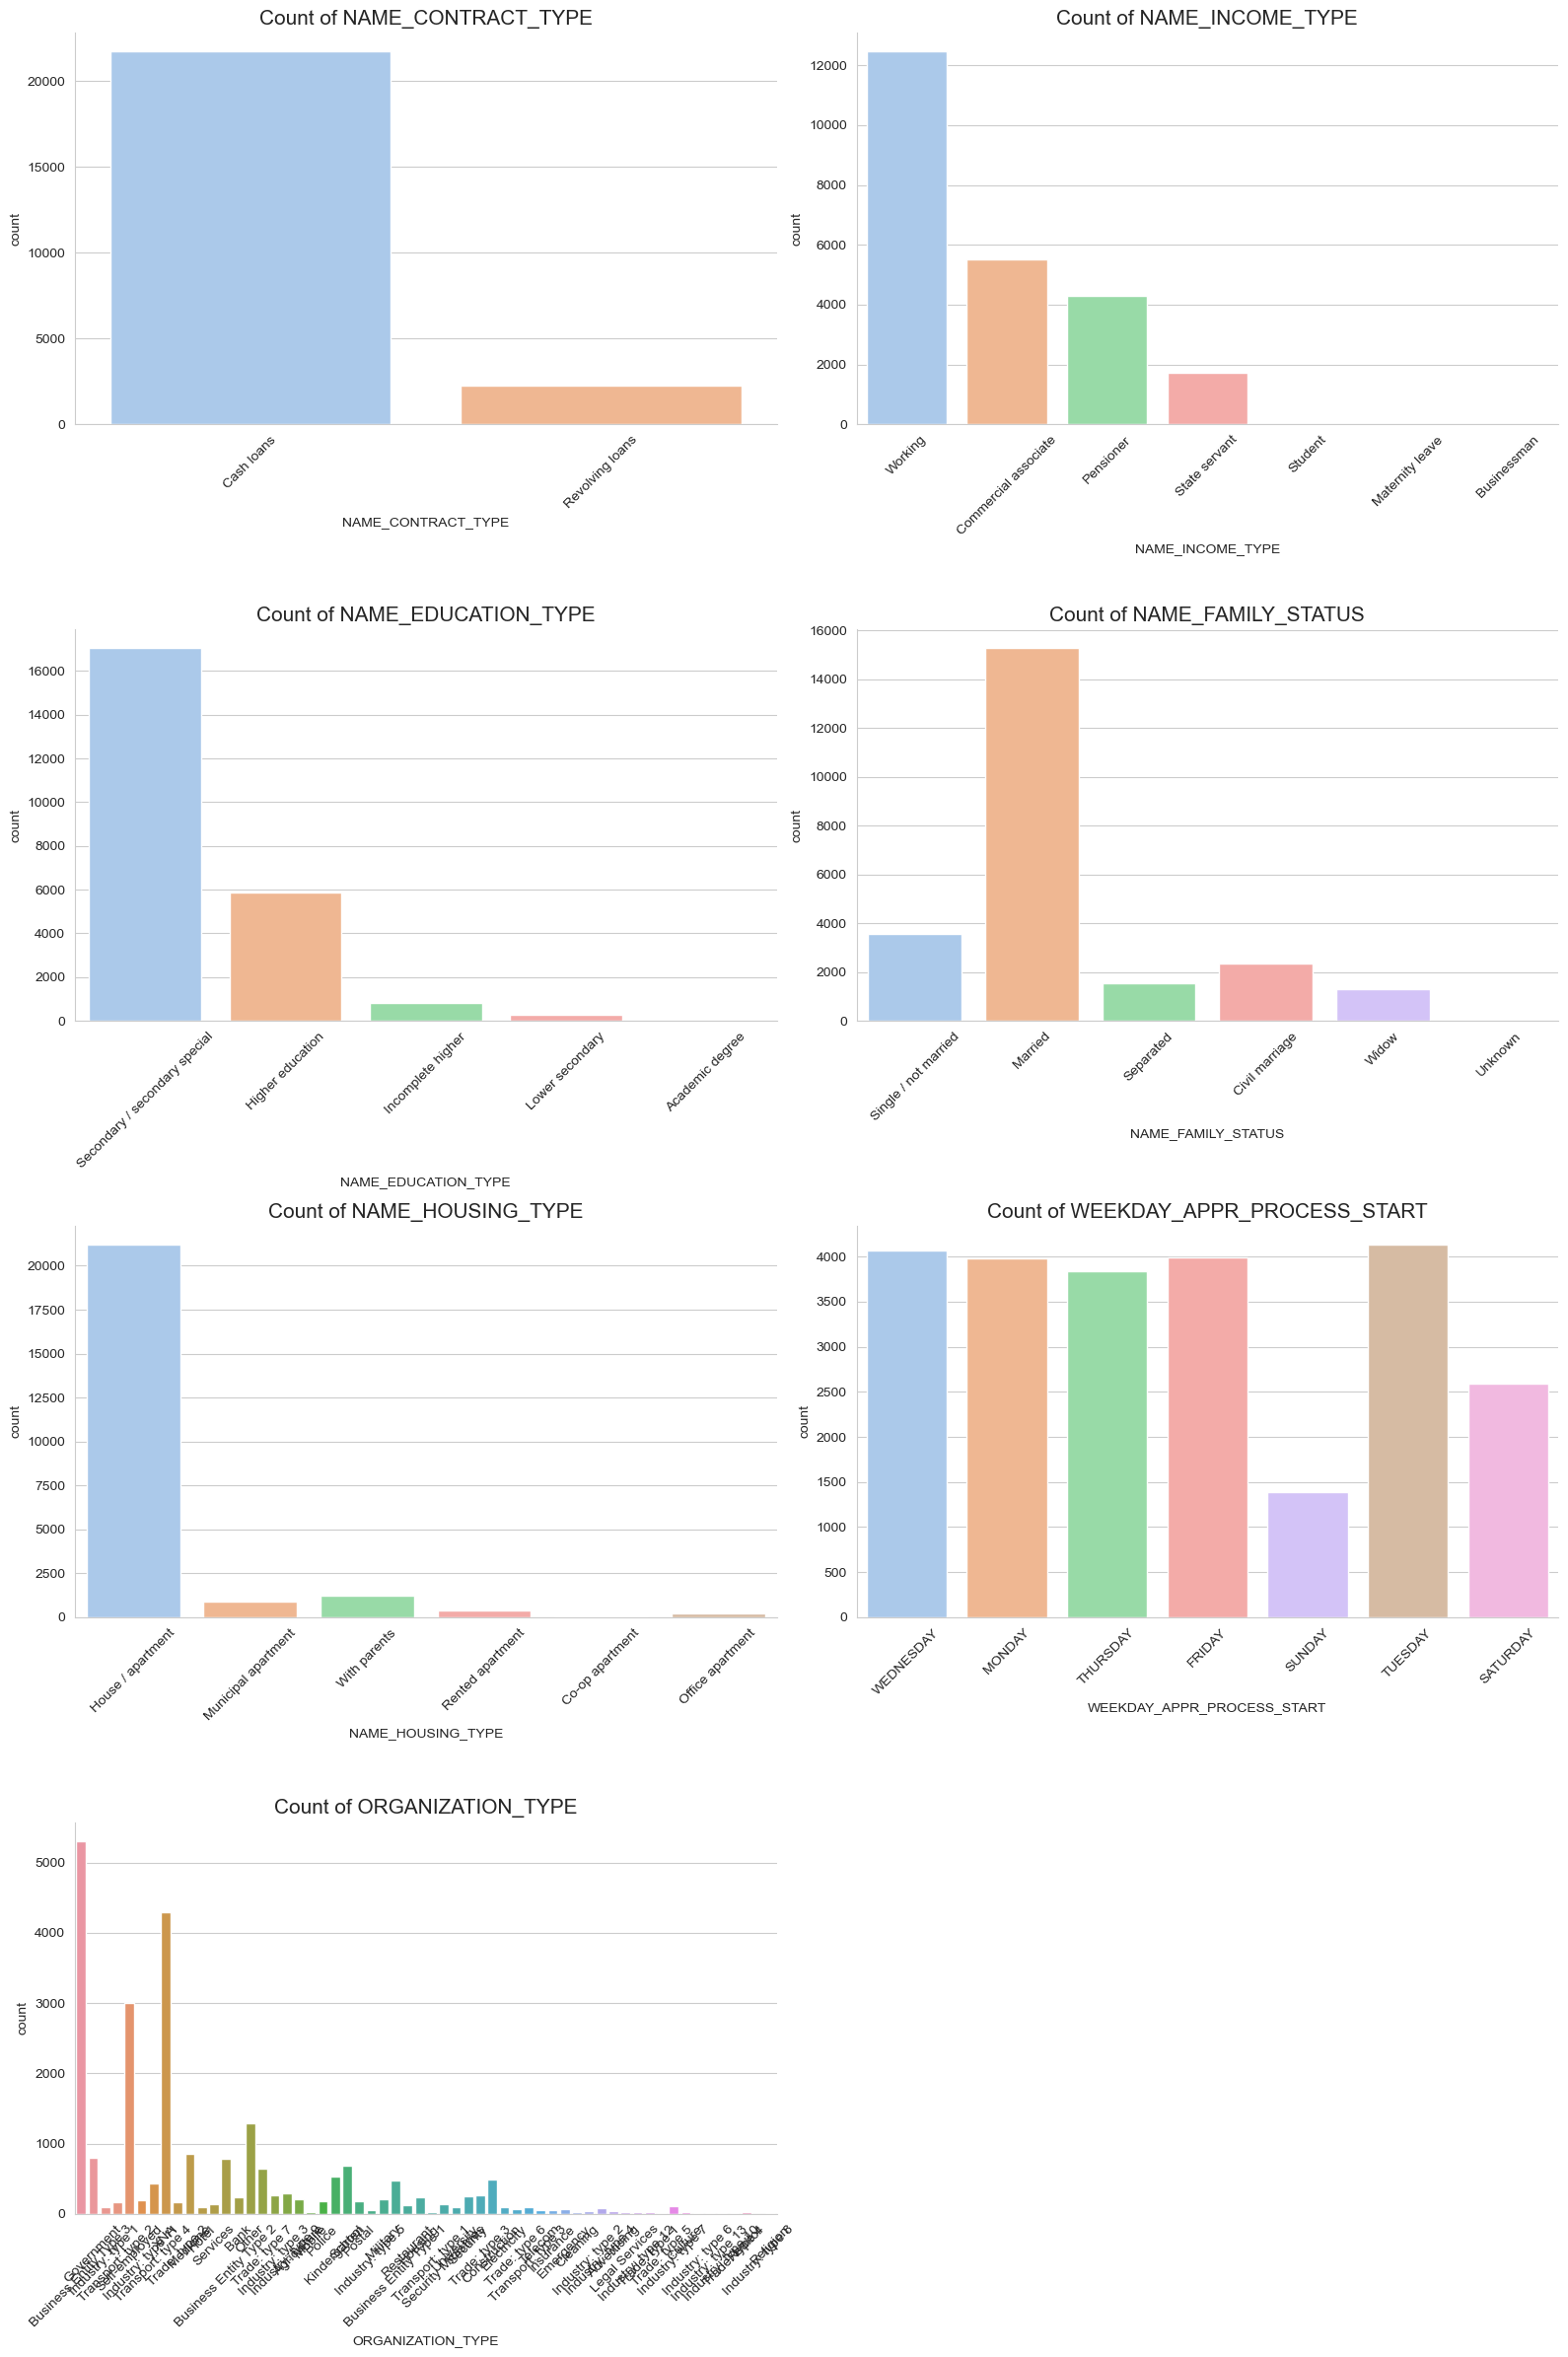

In [58]:
# 범주형 변수 시각화 (막대 그래프)

sns.set_style("whitegrid")
sns.set_palette("pastel")


# Calculate the number of rows needed for the plot
n_rows = (len(categorical_columns) + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*6))

for idx in range(n_rows * 2):
    i = idx // 2
    j = idx % 2
    
    # Skip if there's no data for this subplot
    if idx >= len(categorical_columns):
        fig.delaxes(axes[i,j]) # delete the empty subplot
        continue
    
    column = categorical_columns[idx]
    
    # Create the countplot on designated subplot (axes[i,j])
    sns.countplot(x=data[column], data=data, ax=axes[i,j])
    
    # Set the title and labels of the graph
    axes[i,j].set_title(f'Count of {column}', fontsize=15)
    
    # Rotate x-axis labels for better visibility if necessary
    axes[i,j].tick_params(axis='x', rotation=45)

# Remove top and right borders for cleaner look & adjust layout for better visibility 
sns.despine()
plt.tight_layout()

plt.show()